In [8]:
def read_testcase(filename):
    with open(filename, 'r') as f:
        n, q = map(int, f.readline().split())
        Q = []
        for _ in range(q):
            i, j = map(int, f.readline().split())
            Q.append((i-1, j-1))
        d = list(map(int, f.readline().split()))
        m = int(f.readline())
        s = list(map(int, f.readline().split()))
        c = int(f.readline())
        C = {}
        for _ in range(c):
            i, j, cost = map(int, f.readline().split())
            C[(i-1, j-1)] = cost

    def find_cycles(edges):
        def dfs(v, visited, stack, path):
            # Đánh dấu đỉnh hiện tại là đã thăm
            visited[v] = True
            stack[v] = True
            path.append(v)
            
            # Duyệt qua tất cả các đỉnh kề
            for neighbor in graph.get(v, []):
                if stack.get(neighbor):  # Nếu đỉnh kề đã có trong stack, ta tìm được chu trình
                    cycle_start_index = path.index(neighbor)
                    cycles.append(path[cycle_start_index:])
                elif not visited.get(neighbor):
                    dfs(neighbor, visited, stack, path)
            
            # Sau khi thăm tất cả các kề của v, gỡ bỏ v khỏi stack
            stack[v] = False
            path.pop()
        
        # Tạo graph từ danh sách các cạnh
        graph = {}
        for u, v in edges:
            if u not in graph:
                graph[u] = []
            graph[u].append(v)
        
        # Để lưu trữ chu trình
        cycles = []
        visited = {}
        stack = {}
        
        # Duyệt qua tất cả các đỉnh trong đồ thị
        for node in graph:
            visited[node] = False
            stack[node] = False

        for node in graph:
            if not visited[node]:
                dfs(node, visited, stack, [])
        
        return cycles

    def find_dependent_tasks(cycles):
        # Tìm tất cả các task phụ thuộc vào các task trong cycle
        dependent_tasks = set(cycles)
        queue = list(cycles)
        
        while queue:
            current = queue.pop(0)
            # Tìm tất cả các task phụ thuộc vào current
            for u, v in Q:
                if u == current and v not in dependent_tasks:
                    dependent_tasks.add(v)
                    queue.append(v)
        
        return dependent_tasks

    # Tạo đồ thị từ các ràng buộc Q
    graph = {}
    for u, v in Q:
        if u not in graph:
            graph[u] = []
        graph[u].append(v)

    # Tìm các chu trình
    import itertools
    cycles = set(itertools.chain(*find_cycles(Q)))
    tasks_to_remove = find_dependent_tasks(cycles)

    # 2. Tìm các task không có team nào có thể thực hiện
    tasks_with_teams = set()
    for task, team in C:
        tasks_with_teams.add(task)

    tasks_without_teams = set(range(n)) - tasks_with_teams
    if tasks_without_teams:
        # Thêm các task phụ thuộc vào tasks_without_teams
        additional_tasks = find_dependent_tasks(tasks_without_teams)
        # print("additional_tasks", additional_tasks)
        tasks_to_remove.update(additional_tasks)

    # Loại bỏ các task khỏi C
    for task_1, team in C.copy():
        if task_1 in tasks_to_remove:
            C.pop((task_1, team))

    # Tạo danh sách các task khả dụng
    available_task = []
    for task, team in C:
        if task in tasks_to_remove:
            continue
        if task not in available_task:
            available_task.append(task)

    # Cập nhật các ràng buộc Q
    for task_1, task_2 in Q.copy():
        if task_1 not in available_task or task_2 not in available_task:
            Q.remove((task_1, task_2))

    pre_tasks = {task: [] for task in available_task}
    for task_1, task_2 in Q:
        pre_tasks[task_2].append(task_1)

    task_and_team = {task: [] for task in available_task}
    for task, team in C:
        task_and_team[task].append(team)

    return n, q, Q, d, m, s, c, C, pre_tasks, task_and_team

[4596, 4596, 4596, 4596, 4596, 4596, 4596, 4596, 4596, 4596]
[6471, 6364, 6337, 6341, 6450, 6394, 6424, 6489, 6486, 6337]


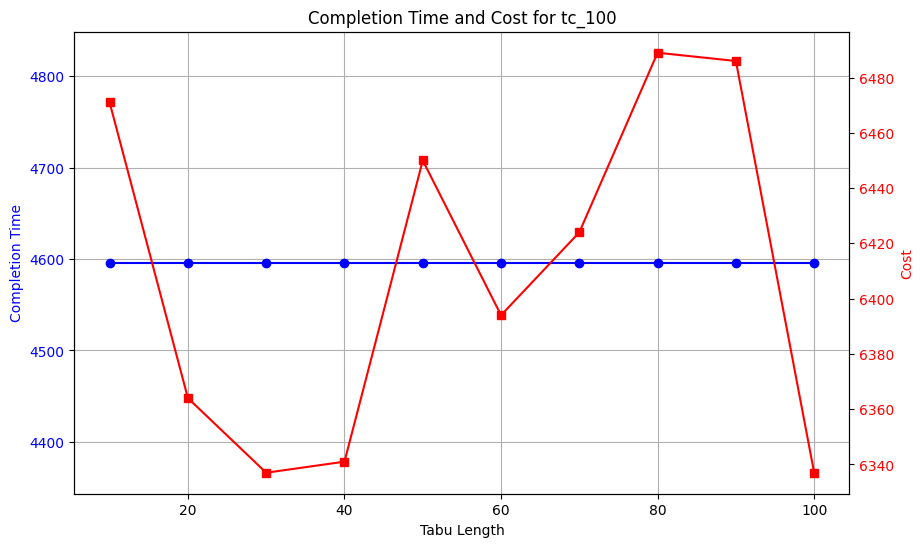

[14429, 12984, 13902, 14067, 15370, 15603, 14471, 13898, 14767, 13492]
[230818, 223598, 221569, 228828, 221629, 221281, 224245, 219091, 211185, 217974]


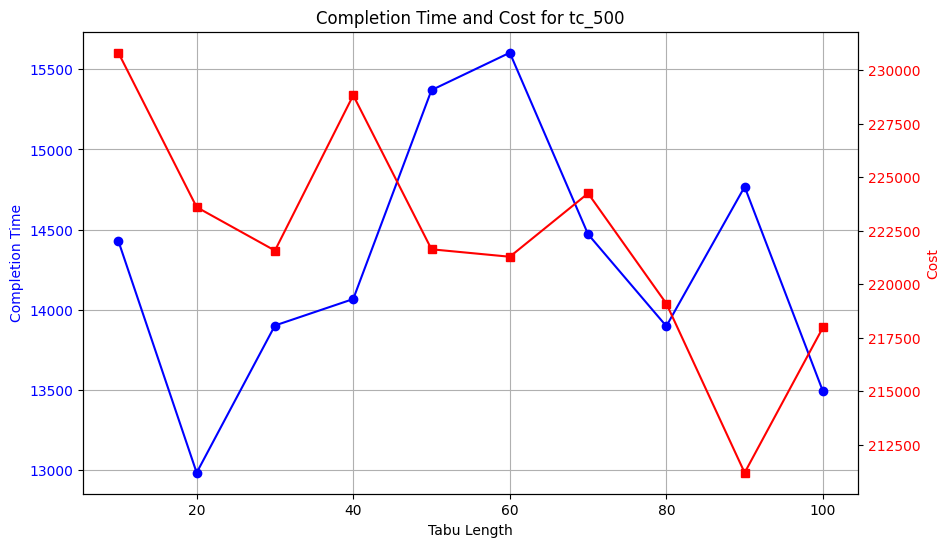

[6567, 6640, 7016, 7950, 7316, 6034, 6590, 5993, 6102, 6467]
[258357, 262376, 262300, 260341, 252072, 264963, 265850, 258851, 272570, 268300]


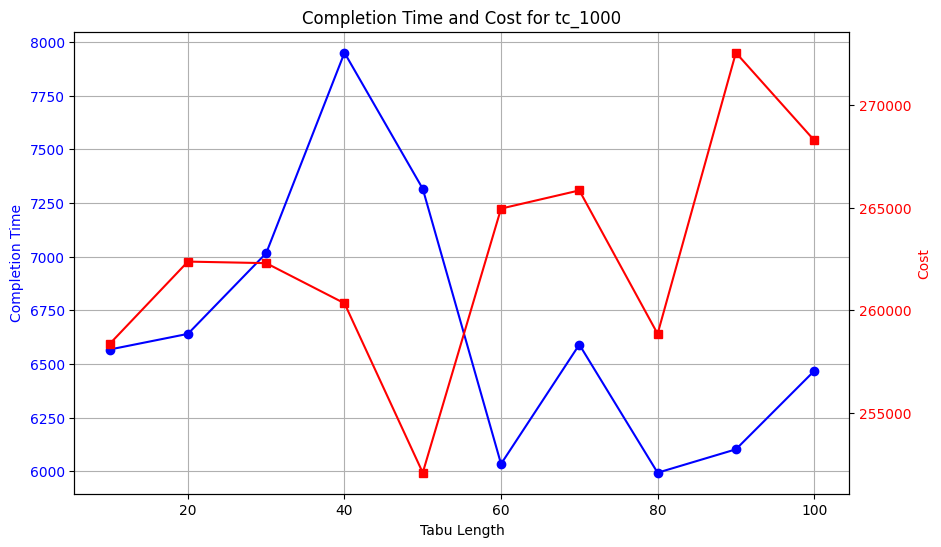

[7430, 7593, 7152, 7605, 7895, 7975, 8654, 7416, 7084, 7416]
[343915, 343628, 340917, 335846, 351504, 340315, 326145, 339476, 342586, 339756]


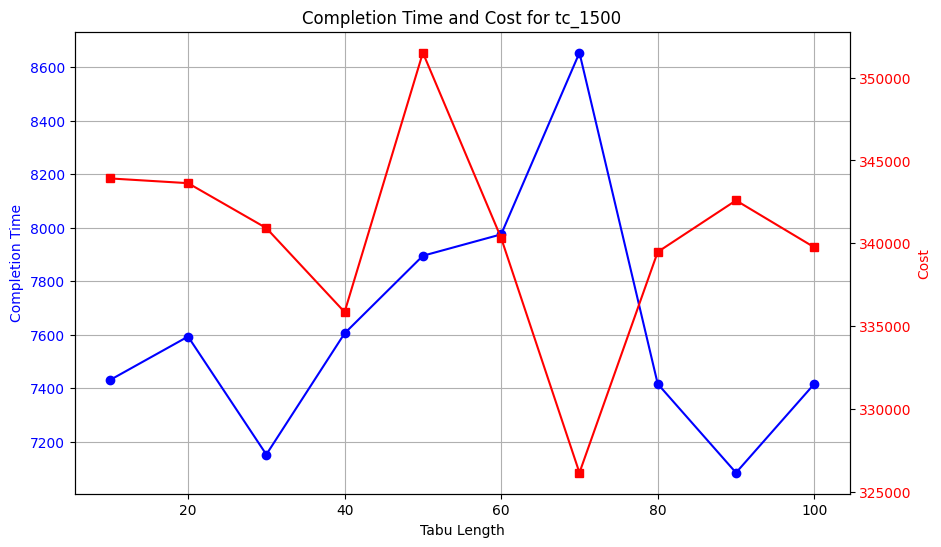

In [15]:
# re-import local_search_team_and_order
import importlib
import tabu_search
importlib.reload(tabu_search)

results_log_size = {}
for size in [10, 100, 500, 1000, 2000]:
    results_log_size[size] = {}
    n, q, Q, d, m, s, c, C, pre_tasks, task_and_team = read_testcase(f'synthetic_data/tc_{size}.txt')
    print(n, m, q, c)

    for tabu_length in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
        results = tabu_search.tabu_search(n, q, Q, d, m, s, c, C, pre_tasks, task_and_team, tabu_length)
        print(tabu_search.calculate_result(results, d, C))
        results_log_size[size][tabu_length] = tabu_search.calculate_result(results, d, C)

from matplotlib import pyplot as plt

for size in [100, 500, 1000, 1500]:
    # Extract data from the log
    tabu_lengths = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    count_time = []
    for tabu_length in tabu_lengths:
        count_time.append(results_log_size[size][tabu_length][1])

    count_cost = []
    for tabu_length in tabu_lengths:
        count_cost.append(results_log_size[size][tabu_length][2])

    print(count_time)
    print(count_cost)
    # Tạo đồ thị với hai trục y
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # Trục y đầu tiên cho count_time
    ax1.set_xlabel('Tabu Length')
    ax1.set_ylabel('Completion Time', color='blue')
    ax1.plot(tabu_lengths, count_time, label='Count Time', marker='o', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Tạo trục y thứ hai cho count_cost
    ax2 = ax1.twinx()  # Chia sẻ trục x với ax1
    ax2.set_ylabel('Cost', color='red')
    ax2.plot(tabu_lengths, count_cost, label='Cost', marker='s', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Thêm tiêu đề và hiển thị đồ thị
    plt.title(f'Completion Time and Cost for tc_{size}')
    plt.show()

100 80 100 1580
(100, 550, 1900)
(100, 570, 1780)
(100, 570, 1690)
(100, 550, 1890)
(100, 550, 1950)
(100, 570, 1820)
(100, 570, 1740)
(100, 550, 1890)
(100, 550, 1910)
(100, 550, 1860)
10 (100.0, 558.0, 1843.0) (0.0, 9.797958971132712, 79.0)
(100, 550, 1910)
(100, 550, 1910)
(100, 550, 1930)
(100, 550, 1850)
(100, 550, 1930)
(100, 570, 1880)
(100, 550, 1980)
(100, 550, 1880)
(100, 570, 1690)
(100, 570, 1830)
20 (100.0, 556.0, 1879.0) (0.0, 9.16515138991168, 75.02666192761077)
(100, 550, 1850)
(100, 550, 1940)
(100, 550, 1890)
(100, 550, 1910)
(100, 550, 1940)
(100, 550, 2060)
(100, 550, 1880)
(100, 550, 1880)
(100, 570, 1770)
(100, 550, 1920)
30 (100.0, 552.0, 1904.0) (0.0, 6.0, 70.31358332498779)
(100, 570, 1710)
(100, 550, 1940)
(100, 570, 1700)
(100, 570, 1780)
(100, 550, 1940)
(100, 570, 1740)
(100, 550, 1870)
(100, 550, 1850)
(100, 570, 1760)
(100, 550, 1890)
40 (100.0, 560.0, 1818.0) (0.0, 10.0, 86.69486720677297)
(100, 550, 1880)
(100, 570, 1780)
(100, 550, 1900)
(100, 550, 189

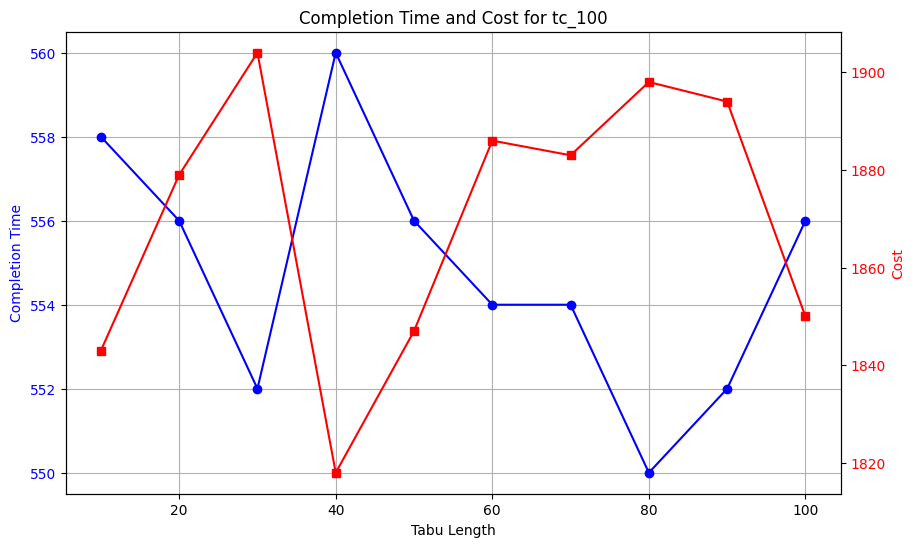

500 200 650 2053
(493, 950, 48820)
(493, 850, 48140)
(493, 890, 50910)
(493, 990, 48960)
(493, 1040, 49780)
(493, 980, 47810)
(493, 970, 49820)
(493, 970, 49550)
(493, 970, 50860)
(493, 890, 49950)
10 (493.0, 950.0, 49460.0) (0.0, 53.85164807134504, 983.2192024162262)
(493, 1170, 47780)
(493, 970, 48320)
(493, 1000, 50470)
(493, 810, 47590)
(493, 1060, 49520)
(493, 940, 50280)
(493, 940, 48900)
(493, 990, 49490)
(493, 970, 47960)
(493, 1020, 48870)
20 (493.0, 987.0, 48918.0) (0.0, 87.41281370600079, 963.8443857801943)
(493, 980, 48810)
(493, 870, 49700)
(493, 990, 48210)
(493, 860, 47560)
(493, 960, 50030)
(493, 1000, 49370)
(493, 940, 48880)
(493, 970, 49750)
(493, 970, 48610)
(493, 1100, 47610)
30 (493.0, 964.0, 48853.0) (0.0, 64.06246951218786, 828.6501071019059)
(493, 970, 48990)
(493, 940, 47170)
(493, 1030, 50420)
(493, 860, 49010)
(493, 960, 50000)
(493, 860, 48280)
(493, 830, 49190)
(493, 920, 49330)
(493, 950, 48970)
(493, 900, 48510)
40 (493.0, 922.0, 48987.0) (0.0, 57.584720

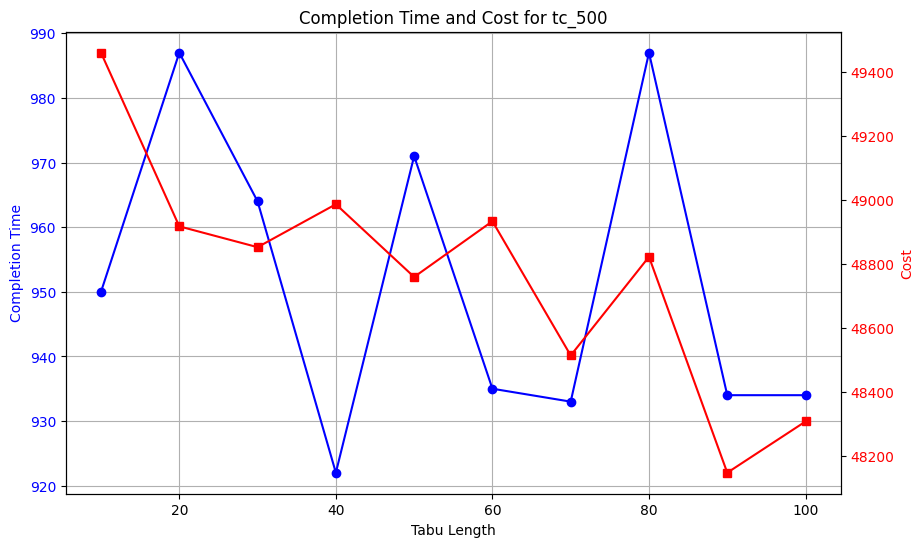

1000 400 1750 4031
(980, 1710, 100940)
(980, 1410, 103630)
(980, 1530, 102200)
(980, 1700, 103640)
(980, 1480, 105240)
(980, 1620, 104100)
(980, 1720, 103290)
(980, 1720, 100180)
(980, 2270, 101800)
(980, 1630, 103240)
10 (980.0, 1679.0, 102826.0) (0.0, 222.28135324403618, 1454.2709513704797)
(980, 1610, 102370)
(980, 1780, 102800)
(980, 1790, 100090)
(980, 2060, 99980)
(980, 1850, 101080)
(980, 1870, 100430)
(980, 1920, 101620)
(980, 1510, 104580)
(980, 1820, 101070)
(980, 1650, 103990)
20 (980.0, 1786.0, 101801.0) (0.0, 152.0, 1518.1070449741019)
(980, 2120, 101790)
(980, 1660, 103620)
(980, 1510, 103100)
(980, 1530, 101200)
(980, 1630, 100260)
(980, 1960, 103980)
(980, 2090, 101650)
(980, 1790, 101070)
(980, 1890, 102640)
(980, 1960, 101760)
30 (980.0, 1814.0, 102107.0) (0.0, 212.0, 1131.6629356835895)
(980, 1850, 103320)
(980, 1760, 103900)
(980, 1770, 101440)
(980, 1890, 102800)
(980, 2170, 102530)
(980, 2010, 102680)
(980, 1430, 105300)
(980, 1580, 101900)
(980, 1690, 102990)
(98

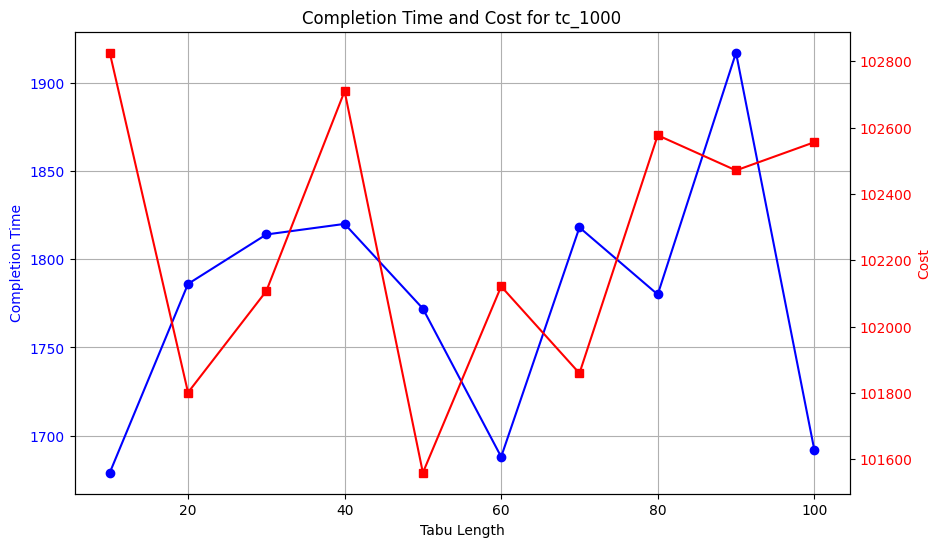

In [15]:
# re-import local_search_team_and_order
import importlib
import tabu_search
importlib.reload(tabu_search)
import numpy as np
from matplotlib import pyplot as plt

results_log_size = {}
for size in [500, 1000, 2000]:
    results_log_size[size] = {}
    n, q, Q, d, m, s, c, C, pre_tasks, task_and_team = read_testcase(f'testcases/tc_{size}.txt')
    print(n, m, q, c)

    for tabu_length in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
        temp_results = []
        count = 1
        for i in range(count):
            results = tabu_search.tabu_search(n, q, Q, d, m, s, c, C, pre_tasks, task_and_team, tabu_length)
            print(tabu_search.calculate_result(results, d, C))
            temp_results.append(tabu_search.calculate_result(results, d, C))
        mean_results = (float(np.mean([temp_results[i][0] for i in range(count)])), float(np.mean([temp_results[i][1] for i in range(count)])), float(np.mean([temp_results[i][2] for i in range(count)])))
        std_results = (float(np.std([temp_results[i][0] for i in range(count)])), float(np.std([temp_results[i][1] for i in range(count)])), float(np.std([temp_results[i][2] for i in range(count)])))
        results_log_size[size][tabu_length] = (mean_results, std_results)
        print(tabu_length, mean_results, std_results)

    # Extract data from the log
    tabu_lengths = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    count_time = []
    for tabu_length in tabu_lengths:
        count_time.append(results_log_size[size][tabu_length][0][1])

    count_cost = []
    for tabu_length in tabu_lengths:
        count_cost.append(results_log_size[size][tabu_length][0][2])

    print(count_time)
    print(count_cost)
    # Tạo đồ thị với hai trục y
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # Trục y đầu tiên cho count_time
    ax1.set_xlabel('Tabu Length')
    ax1.set_ylabel('Completion Time', color='blue')
    ax1.plot(tabu_lengths, count_time, label='Count Time', marker='o', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Tạo trục y thứ hai cho count_cost
    ax2 = ax1.twinx()  # Chia sẻ trục x với ax1
    ax2.set_ylabel('Cost', color='red')
    ax2.plot(tabu_lengths, count_cost, label='Cost', marker='s', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Thêm tiêu đề và hiển thị đồ thị
    plt.title(f'Completion Time and Cost for tc_{size}')
    plt.show()

In [9]:
# normal init
# re-import local_search_team_and_order
import importlib
import tabu_search_stuck as tabu_search
import numpy as np
from matplotlib import pyplot as plt
importlib.reload(tabu_search)

print('STUCK COUNT LIMIT = 100')
results_log_size = {}
for size in [500, 1000, 2000]:
    n, q, Q, d, m, s, c, C, pre_tasks, task_and_team = read_testcase(f'testcases/tc_{size}.txt')
    print(n, m, q, c)

    count = 1  
    temp_results = []
    for i in range(count):
        results, _ = tabu_search.tabu_search(n, q, Q, d, m, s, c, C, pre_tasks, task_and_team, stuck_count_limit=100)
        results_task, results_time, results_cost = tabu_search.calculate_result(results, d, C)
        temp_results.append((results_task, results_time, results_cost))
        print(results_task, results_time, results_cost)
    mean_results = (float(np.mean([temp_results[i][0] for i in range(count)])), float(np.mean([temp_results[i][1] for i in range(count)])), float(np.mean([temp_results[i][2] for i in range(count)])))
    std_results = (float(np.std([temp_results[i][0] for i in range(count)])), float(np.std([temp_results[i][1] for i in range(count)])), float(np.std([temp_results[i][2] for i in range(count)])))
    results_log_size[size] = (mean_results, std_results)
    print(size, mean_results, std_results)
    results_log_size[size] = temp_results

print(results_log_size)

STUCK COUNT LIMIT = 100
500 200 650 2053
454 690 23850
500 (454.0, 690.0, 23850.0) (0.0, 0.0, 0.0)
1000 400 1750 4031


KeyboardInterrupt: 

100 80 100 1580
(100, 550, 1900)


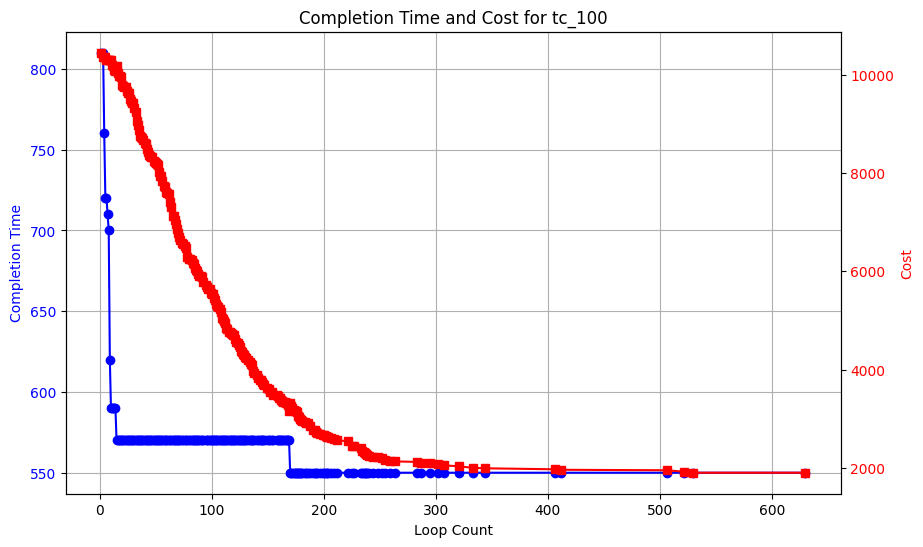

500 200 650 2053
(454, 690, 24220)


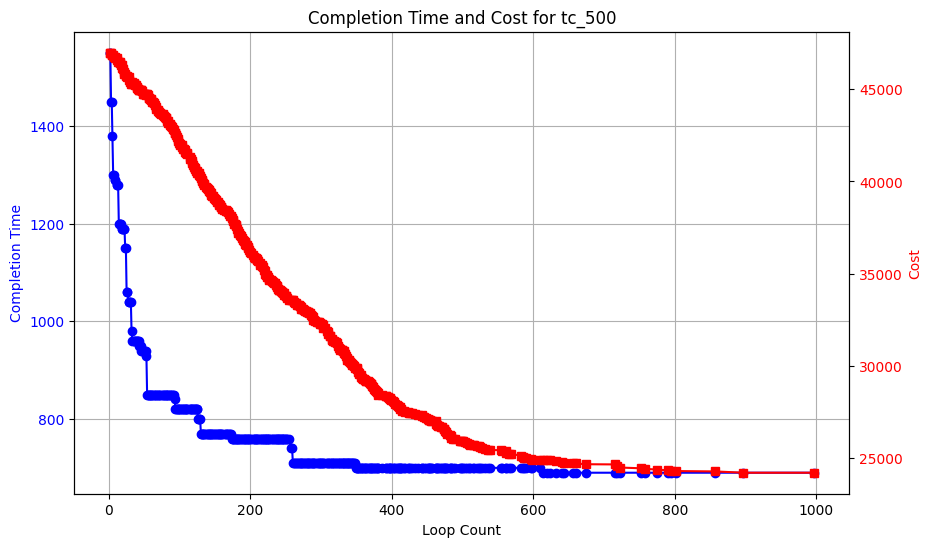

1000 400 1750 4031
(761, 760, 38290)


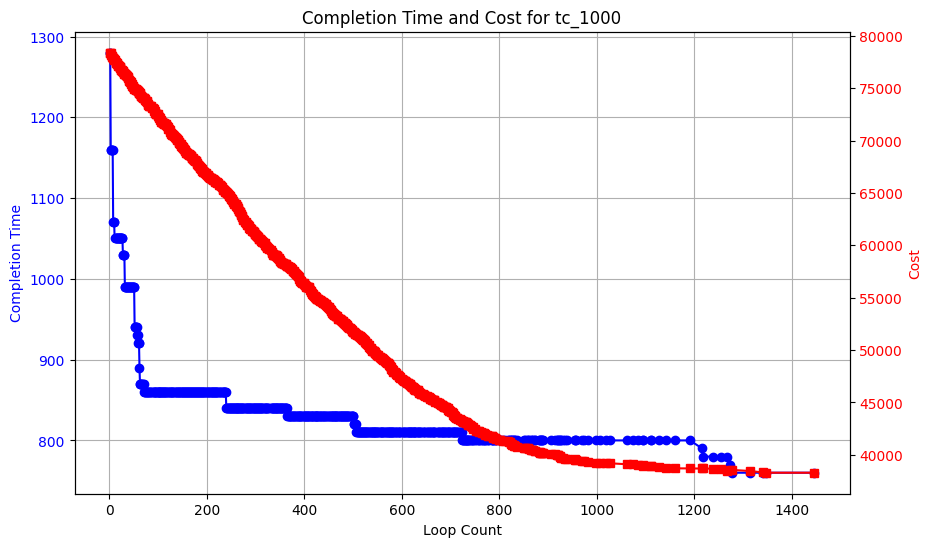

In [12]:
import importlib
import tabu_search_stuck as tabu_search
import numpy as np
from matplotlib import pyplot as plt
importlib.reload(tabu_search)

for size in [100, 500, 1000]:
    n, q, Q, d, m, s, c, C, pre_tasks, task_and_team = read_testcase(f'testcases/tc_{size}.txt')
    print(n, m, q, c)

    results, results_log = tabu_search.tabu_search(n, q, Q, d, m, s, c, C, pre_tasks, task_and_team, time_limit=100, stuck_count_limit=100)
    print(tabu_search.calculate_result(results, d, C))
    # Extract data from the log
    loop_count = [entry[0] for entry in results_log]
    count_time = [entry[1][1] for entry in results_log]
    count_cost = [entry[1][2] for entry in results_log]

    # Tạo đồ thị với hai trục y
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # Trục y đầu tiên cho count_time
    ax1.set_xlabel('Loop Count')
    ax1.set_ylabel('Completion Time', color='blue')
    ax1.plot(loop_count, count_time, label='Count Time', marker='o', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Tạo trục y thứ hai cho count_cost
    ax2 = ax1.twinx()  # Chia sẻ trục x với ax1
    ax2.set_ylabel('Cost', color='red')
    ax2.plot(loop_count, count_cost, label='Cost', marker='s', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Thêm tiêu đề và hiển thị đồ thị
    plt.title(f'Completion Time and Cost for tc_{size}')
    plt.show()

GREEDY INIT
100 80 100 1580
(100, 550, 1900)


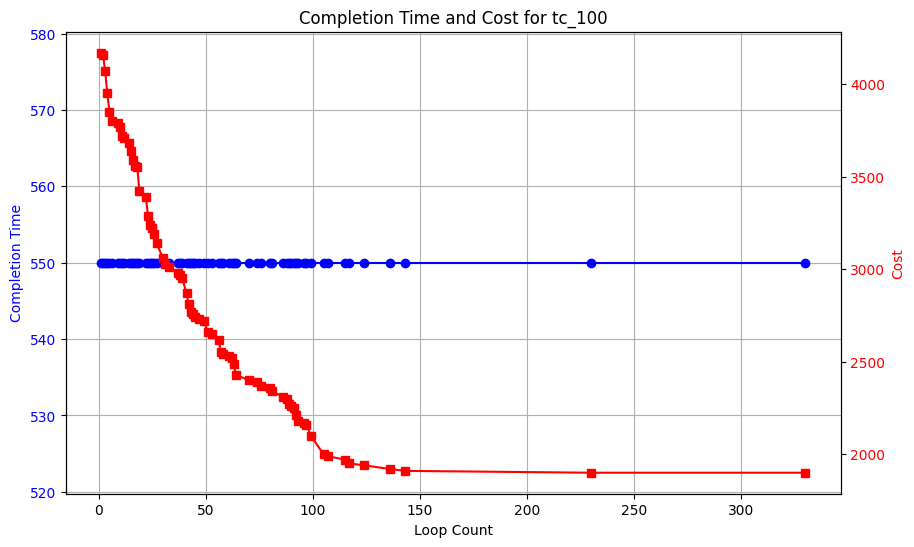

500 200 650 2053
(454, 690, 23410)


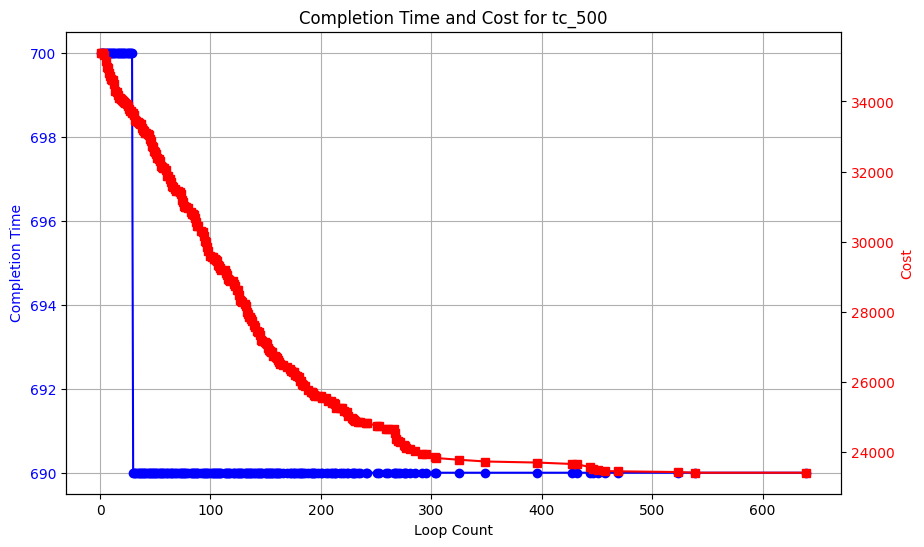

1000 400 1750 4031
(761, 650, 38070)


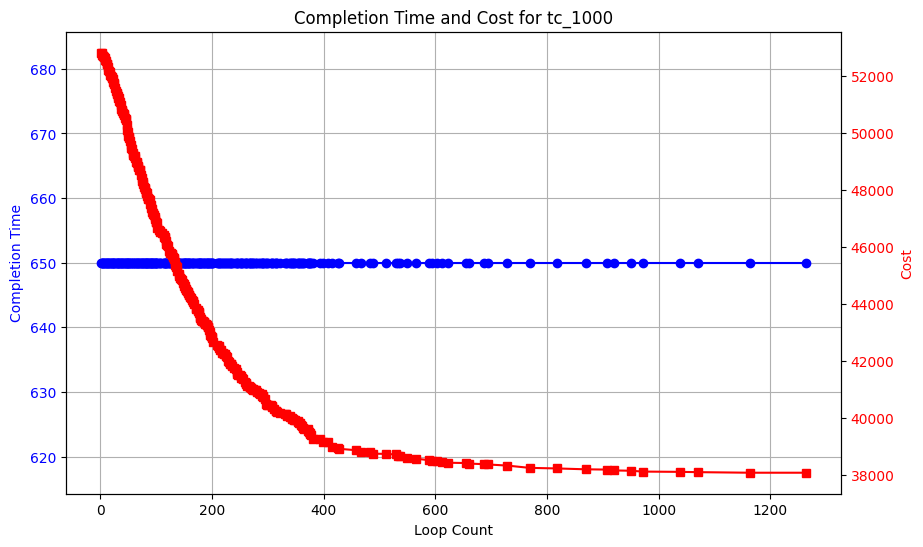

In [23]:
import importlib
import tabu_search
import numpy as np
from matplotlib import pyplot as plt
importlib.reload(tabu_search)

print('GREEDY INIT')
for size in [100, 500, 1000]:
    n, q, Q, d, m, s, c, C, pre_tasks, task_and_team = read_testcase(f'testcases/tc_{size}.txt')
    print(n, m, q, c)

    results, results_log = tabu_search.tabu_search(n, q, Q, d, m, s, c, C, pre_tasks, task_and_team, time_limit=1000, stuck_count_limit=100)
    print(tabu_search.calculate_result(results, d, C))
    # Extract data from the log
    loop_count = [entry[0] for entry in results_log]
    count_time = [entry[1][1] for entry in results_log]
    count_cost = [entry[1][2] for entry in results_log]

    # Tạo đồ thị với hai trục y
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # Trục y đầu tiên cho count_time
    ax1.set_xlabel('Loop Count')
    ax1.set_ylabel('Completion Time', color='blue')
    ax1.plot(loop_count, count_time, label='Count Time', marker='o', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Tạo trục y thứ hai cho count_cost
    ax2 = ax1.twinx()  # Chia sẻ trục x với ax1
    ax2.set_ylabel('Cost', color='red')
    ax2.plot(loop_count, count_cost, label='Cost', marker='s', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Thêm tiêu đề và hiển thị đồ thị
    plt.title(f'Completion Time and Cost for tc_{size}')
    plt.show()

In [ ]:
import importlib
import tabu_search
import numpy as np
from matplotlib import pyplot as plt
importlib.reload(tabu_search)

print('GREEDY INIT')
for size in [500]:
    n, q, Q, d, m, s, c, C, pre_tasks, task_and_team = read_testcase(f'testcases/tc_{size}.txt')
    print(n, m, q, c)

    results, results_log = tabu_search.tabu_search(n, q, Q, d, m, s, c, C, pre_tasks, task_and_team, time_limit=1000, stuck_count_limit=100)
    print(tabu_search.calculate_result(results, d, C))
    # Extract data from the log
    loop_count = [entry[0] for entry in results_log]
    count_time = [entry[1][1] for entry in results_log]
    count_cost = [entry[1][2] for entry in results_log]

    # Tạo đồ thị với hai trục y
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # Trục y đầu tiên cho count_time
    ax1.set_xlabel('Loop Count')
    ax1.set_ylabel('Completion Time', color='blue')
    ax1.plot(loop_count, count_time, label='Count Time', marker='o', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Tạo trục y thứ hai cho count_cost
    ax2 = ax1.twinx()  # Chia sẻ trục x với ax1
    ax2.set_ylabel('Cost', color='red')
    ax2.plot(loop_count, count_cost, label='Cost', marker='s', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Thêm tiêu đề và hiển thị đồ thị
    plt.title(f'Completion Time and Cost for tc_{size}')
    plt.show()